Прежде чем вы решите эту задачу, убедитесь, что все работает должным образом. Для начала, **restart the kernel** (перезапустите ядро) (для этого:Kernel$\rightarrow$Restart)  после чего **run all cells** (запустите все ячейки) (для этого: select Cell$\rightarrow$Run All).

Убедитесь, что вы заполнили все места с надписью `YOUR CODE HERE` или "YOUR ANSWER HERE", а также ваше имя ниже:

In [32]:
NAME = ""
from numpy.testing import assert_allclose

---

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 1D прямоугольная потенциальная яма

Рассмотрим квантовую частицу, описываемую волновой функцией $\psi(x)$ , находящуюся в потенциальной яме $V(x)$.
Для простоты рассмотрим только одномерную вещественную переменную $x$.

Волновая функция частицы подчиняется уравнению Шедингера


$$
-\frac{\hbar^2}{2m} \psi''(x)  + V(x)\psi(x) = E\psi(x)\;.
$$

Здесь $\hbar$ постоянная Планка, $m$ масса частицы (обе известны) и $E$ энергия частицы.


Учитывая граничные условия, ненулевое решение для $\psi(x)$ существует только для некоторых значений энергий. Физики говорят, что энергия частицы _квантована_. Математики говорят, что это не что иное, как проблема собственных значений оператора Штурма-Лиувилля


$$
L = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + V(x) \;.
$$


Здесь мы рассматриваем так называемый потенциал прямоугольной ямы,


$$
V(x) = %
\begin{cases}
&0, &0 < x < a \\
&\infty, &\text{в остальных случаях.} 
\end{cases}
$$

Define
$$
E = \frac{\hbar^2}{2m} k^2
$$

Уравнение Шредингера для $0 < x < a$ становится

$$
\psi''(x) = -k^2 \psi(x)
$$

с граничными условиями $\psi(0) = \psi(a) = 0$.

Решения

$$\psi_n(x) = \sqrt{\frac{2}{a}} \sin{k_n x}$$


где

$$
k_n a = \pi n\;, \qquad n = 1, 2, \cdots
$$

Так что энергии равны

$$
E_n = \frac{\pi^2\hbar^2}{2ma^2} n^2
$$

# Задача 1. Собственные функции

Определите сетку

$$x_j = a \frac{j}{N}, \qquad j=0, \cdots, N
$$

и сеточную функцию $\psi_j$.

Уравнение Шредингера становится

$$
\psi_{j-1} + \psi_{j+1} - 2\psi_{j} = -k^2 h^2 \psi_j \; , \qquad j = 1, \cdots, N-1
$$

где $h=a/N$ является расстоянием между сетками, а граничнми условия являются $\psi_0 = \psi_N = 0$.

Обратите внимание, что последнее уравнение определяет задачу на собственные значения в  $N-1$ мерном пространстве, охватываемом векторами $(\psi_1, \psi_2, \cdots, \psi_{N-1})^T$. Здесь матрица, собственные значения которой мы ищем, является трехдиагональной, а допустимые значения $(k h)^2$ являются ее собственными значениями.

Напишите функцию, которая возвращает матрицу для задачи на собственные значения, описанной выше.

Функция numpy `np.fill_diagonal` может быть удобна при решении задачи. Также обратите внимание, что для заполнения диагоналей вы можете разрезать матрицу примерно так: `a[1:, :]`.

In [67]:
def hamiltonian(npts):
    """Постройте матрицу собственных значений для 1D уравнения Шредингера.
    
    на ввод
    ----------
    npts : int
        Количество узлов в меше: $x_j = a*j /npts$, with $j=0, ..., npts$
        
    выводит
    ----------
    ham : ndarray, shape(npts-1, npts-1)
        Матрица меш версии оператора Штурма-Лиувилля.
    """
    
    A = np.zeros((npts, npts))
    i,j = np.indices(A.shape)
    flat = A.ravel()
    
    A[i==j] = -2
    A[i==j+1] = 1
    A[i==j-1] = 1
    
    return A[:-1,:-1]

In [68]:
N = 20
ham = hamiltonian(N)
assert ham.shape == (N-1, N-1)


# Задача 2. Решите задачу о собственных значениях

Напишите функцию, которая возвращает собственные значения и собственные векторы гамильтониана с учетом числа точек на сетке.

In [34]:
def eigensystem(N):
    """Постройте гамильтониан в меше и вычислите его собственные значения и собственные векторы.
    
    Получите собственные значения в отсортированном порядке.
    
    на ввод
    ----------
    N : int
        Количество узлов в меше: $x_j = a*j /N$, with $j=0, ..., N$.
        
    выводит
    -------
    vals : ndarray, shape(N-1,)
        Собственные значения в порядке возрастания.
        
    vects : ndarray, shape(N-1, N-1)
        Собственные векторы, расположенные в столбцах: `vect[:, j]` is the 
        нормализованный собственный вектор, соответствующий `vals[j]`.
    """
    
    w, v = np.linalg.eig(hamiltonian(N))
    ind = np.argsort(w)
    
    return w[ind], v.T[ind].T

In [35]:
N = 10
ham = hamiltonian(10)
vals, vects = eigensystem(10)

assert (vals[1:] >= vals[:-1]).all()

for j in range(vals.shape[0]):
    assert_allclose(ham @ vects[:, j],
                    vals[j] * vects[:, j], atol=1e-10)


# Задача 3. Длинноволновый предел FD задачи

Мы ожидаем, что в пределе $N\to\infty$ решения дискретной системы стремятся к решению непрерывной задачи. 

Постройте спектр FD задачи для нескольких значений $N$. Обратите внимание, что спектр ограничен, т.е. мы можем только надеяться, что низколежащие состояния совпадают: для достаточно больших $N$, несколько первых состояний FD задачи близки к соответствующим собственным состояниям непрерывной задачи.  (Подробнее см., например, A.A. Samarski and A.V. Gulin, раздел 1.4.4)

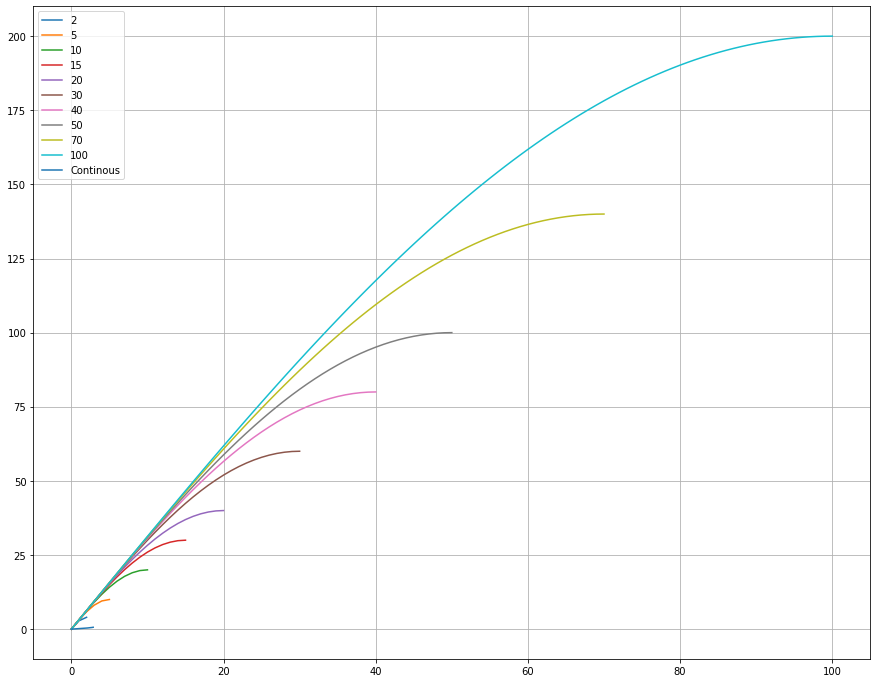

In [49]:
# Постройте спектр FD задачи для нескольких значений N.
# Постройте спектр непрерывной задачи на том же графике.
Ns = [2, 5, 10, 15, 20, 30, 40, 50, 70, 100]
plt.figure(figsize=(15,12))

for N in Ns:
    w, v = eigensystem(N)
    x = np.zeros(N+1)
    x[0] = 4
    x[1:-1] = -w
    plt.plot(np.sqrt(N**2*np.flip(x)), label=str(N))

x = np.arange(0,2/np.pi,0.001)
plt.plot(3*np.cos(2*a+3*np.pi/2),x, label="Continous")
plt.legend()
plt.grid()
plt.show()

Сделайте так, чтобы функция в ячейке ниже возвращала значение $N$ таким образом, чтобы первые 10 собственных значений FD задачи и непрерывной задачи совпадали в пределах относительного допуска $10^{-3}$.

In [104]:
def get_large_N():
    eps = 1e-3
    
    for N in np.arange(20, 500, 10):
        w, v = eigensystem(N)
        
        x = np.zeros(N+1)
        x[0] = 4
        x[1:-1] = -w
        x = np.sqrt(N**2*np.flip(x))[:10]
        
        rang = np.pi*np.arange(0,10,1)
        error = np.max(np.abs((x[1:]-rang[1:])/x[1:]))
        if error < eps:
            return N
    return 0

In [105]:
NN = get_large_N()

vals, _ = eigensystem(NN)

# остальная часть этой ячейки представляет собой тест, который сравнивает первые 10 собственных значений


In [107]:
rang = np.pi*np.arange(0,10,1)
print(rang)
x = np.zeros(NN+1)
x[0] = 4
x[1:-1] = -vals
x = np.sqrt(NN**2*np.flip(x))[:10]
print(x)
print(NN)
print('Error is ', np.max(np.abs((x[1:]-rang[1:])/x[1:])))

[ 0.          3.14159265  6.28318531  9.42477796 12.56637061 15.70796327
 18.84955592 21.99114858 25.13274123 28.27433388]
[ 0.          3.14155687  6.28289901  9.42381173 12.56408034 15.70349021
 18.84182678 21.97887552 25.11442204 28.24825203]
190
Error is  0.0009233086496133147


# Задача 4. Волновые функции

Постройте волновые функции (т.е. собственные векторы) для нескольких наименьших  состояний. Сравните с ожидаемой формой. Сколько нулей имеет число собственных функций $k$?

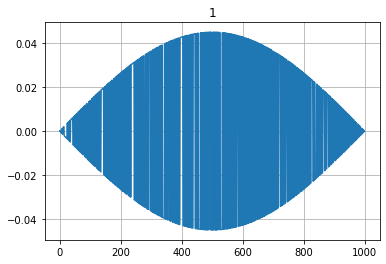

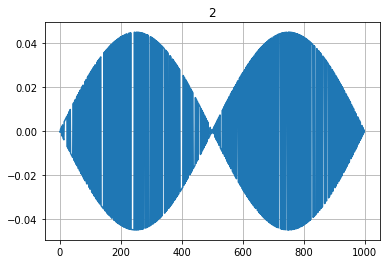

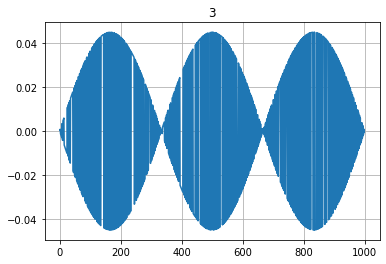

In [56]:
w, v = eigensystem(1000)
x = np.arange(1,1000,1)
plt.plot(x,v[0])
plt.title('1')
plt.grid()
plt.show()
plt.plot(x,v[1])
plt.title('2')
plt.grid()
plt.show()
plt.plot(x,v[2])
plt.title('3')
plt.grid()
plt.show()

# Задача 5. Возмущение

Рассмотрим теперь модифицированный потенциал: добавьте к потенциалу прямоугольной ямы дополнительный член

$$
V(x) = -\frac{\hbar^2}{2m}\, \gamma\, x(x-a)
$$

для $0 < x < a$, where $\gamma$ - константа.

Аналитическое решение можно выразить через функции параболического цилиндра, а численное решение является прямым продолжением того, что мы сделали в предыдущем разделе.

## Численное решение

Опять же, определите сеточную функцию $\psi_j$. Тогда уравнение Шредингера становится

$$
-\left( \psi_{j-1} + \psi_{j+1} - 2\psi_{j} \right) - \gamma h^2 x_j (x_j - a) \psi_j = k^2 h^2 \psi_j \; , \qquad j = 1, \cdots, N-1
$$

так что диагональные элементы гамильтоновой матрицы больше не являются константами.

Постройте гамильтонову матрицу, решите для собственных значений и постройте волновые функции основного состояния для диапазона $\gamma$. Обдумайте структуру волновой функции для $\gamma > 500$.

In [72]:
def hamiltonian_perturbed(gamma, npts):
    """ Постройте матрицу собственных значений для дискретного 1D уравнения Шредингера..
    
    на ввод
    ----------
    gamma : float
        Дополнительный потенциал заключается в $gamma * x * (x-1)$
    npts : int
        Количество узлов в сетке меше: $x_j = a*j /npts$, with $j=0, ..., npts$
        
    выводит
    -------
    ham : ndarray, shape(npts-1, npts-1)
        Матрица меш версии оператора Штурма-Лиувилля.
    """
    A = hamiltonian(npts)
    
    i,j = np.indices(A.shape)
    l = np.zeros(npts)
    l[i] = gamma/npts**4*i*(i-npts)

    return A + np.diag(l)[:-1,:-1]

def eigensystem_p(gamma, N):
    """Постройте гамильтониан в меше и вычислите его собственные значения и собственные векторы.
    
    Получите собственные значения в отсортированном порядке.
    
    на ввод
    ----------
    N : int
        Количество узлов в меше: $x_j = a*j /N$, with $j=0, ..., N$.
        
    выводит
    -------
    vals : ndarray, shape(N-1,)
        Собственные значения в порядке возрастания.
        
    vects : ndarray, shape(N-1, N-1)
        Собственные векторы, расположенные в столбцах: `vect[:, j]` is the 
        нормализованный собственный вектор, соответствующий `vals[j]`.
    """
    
    w, v = np.linalg.eig(hamiltonian_perturbed(gamma, N))
    ind = np.argsort(w)
    
    return w[ind], v.T[ind].T

In [70]:
gamma, N = 590, 11
h = hamiltonian_perturbed(gamma, N)

assert h.shape == (N-1, N-1)


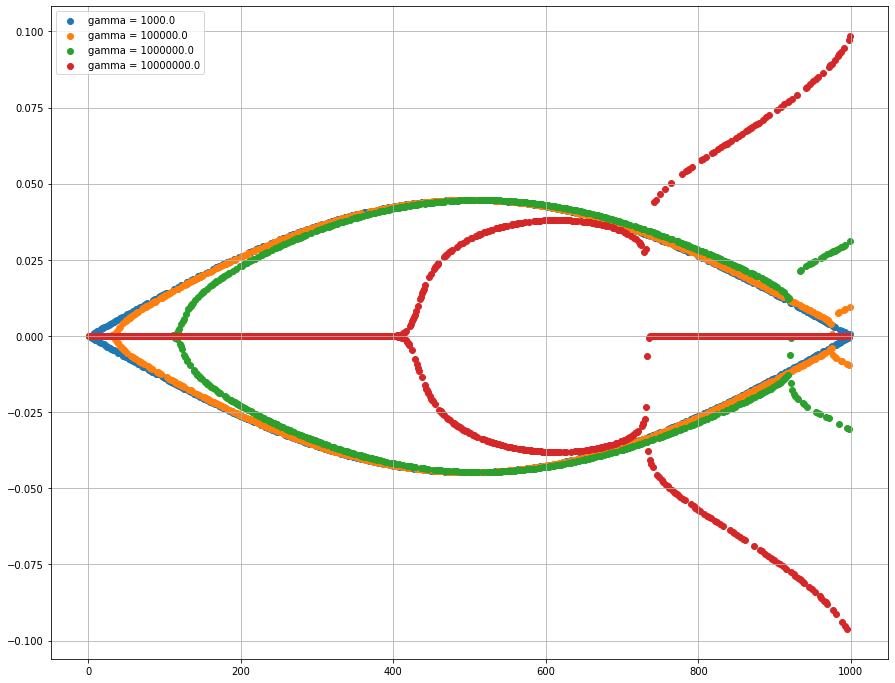

In [83]:
gammas = [1e3, 1e5, 1e6, 1e7]
N = 1000
plt.figure(figsize=(15,12))

for gamma in gammas:
    w, v = eigensystem_p(gamma, N)
    x = np.zeros(N+1)
    x[0] = 4
    x[1:-1] = -w
    plt.scatter(np.arange(1,N,1), v[0], label='gamma = ' + str(gamma))
    
plt.legend()
plt.grid()
plt.show()